<a href="https://colab.research.google.com/github/sivasaiyadav8143/TensorFlow-2.x/blob/main/Classify_Diabetes_Using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEM STATEMENT


<table>
  <tr><td>
    <img src="https://upload.wikimedia.org/wikipedia/commons/e/e6/Doctor_Checkup_Cartoon.svg"
alt="Fashion MNIST sprite"  length = "1500" width="1500">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Diabetes Classification Using ANNs
  </td></tr>
</table>



---
- This dataset is used to predict whether or not a patient has diabetes, based on given features/diagnostic measurements. 
- Only female patients are considered with at least 21 years old of Pima Indian heritage.

- Inputs:
    - Pregnancies: Number of times pregnant
    - GlucosePlasma: glucose concentration a 2 hours in an oral glucose tolerance test
    - BloodPressure: Diastolic blood pressure (mm Hg)
    - Skin: ThicknessTriceps skin fold thickness (mm)
    - Insulin: 2-Hour serum insulin (mu U/ml)
    - BMI: Body mass index (weight in kg/(height in m)^2)
    - DiabetesPedigreeFunction: Diabetes pedigree function
    - Age: Age (years)
- Outputs:
    - Diabetes or no diabetes (0 or 1) 
    
    
- Acknowledgements
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.


---








# STEP #0: IMPORT LIBRARIES

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# STEP #1: IMPORT DATASETS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
diabetes = pd.read_csv('/content/drive/My Drive/Colab Notebooks/diabetes.csv')

In [ ]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# STEP #2: CLEAN UP AND VISUALIZE DATASET

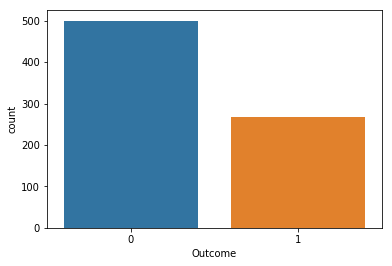

In [ ]:
sns.countplot(x = 'Outcome', data = diabetes)


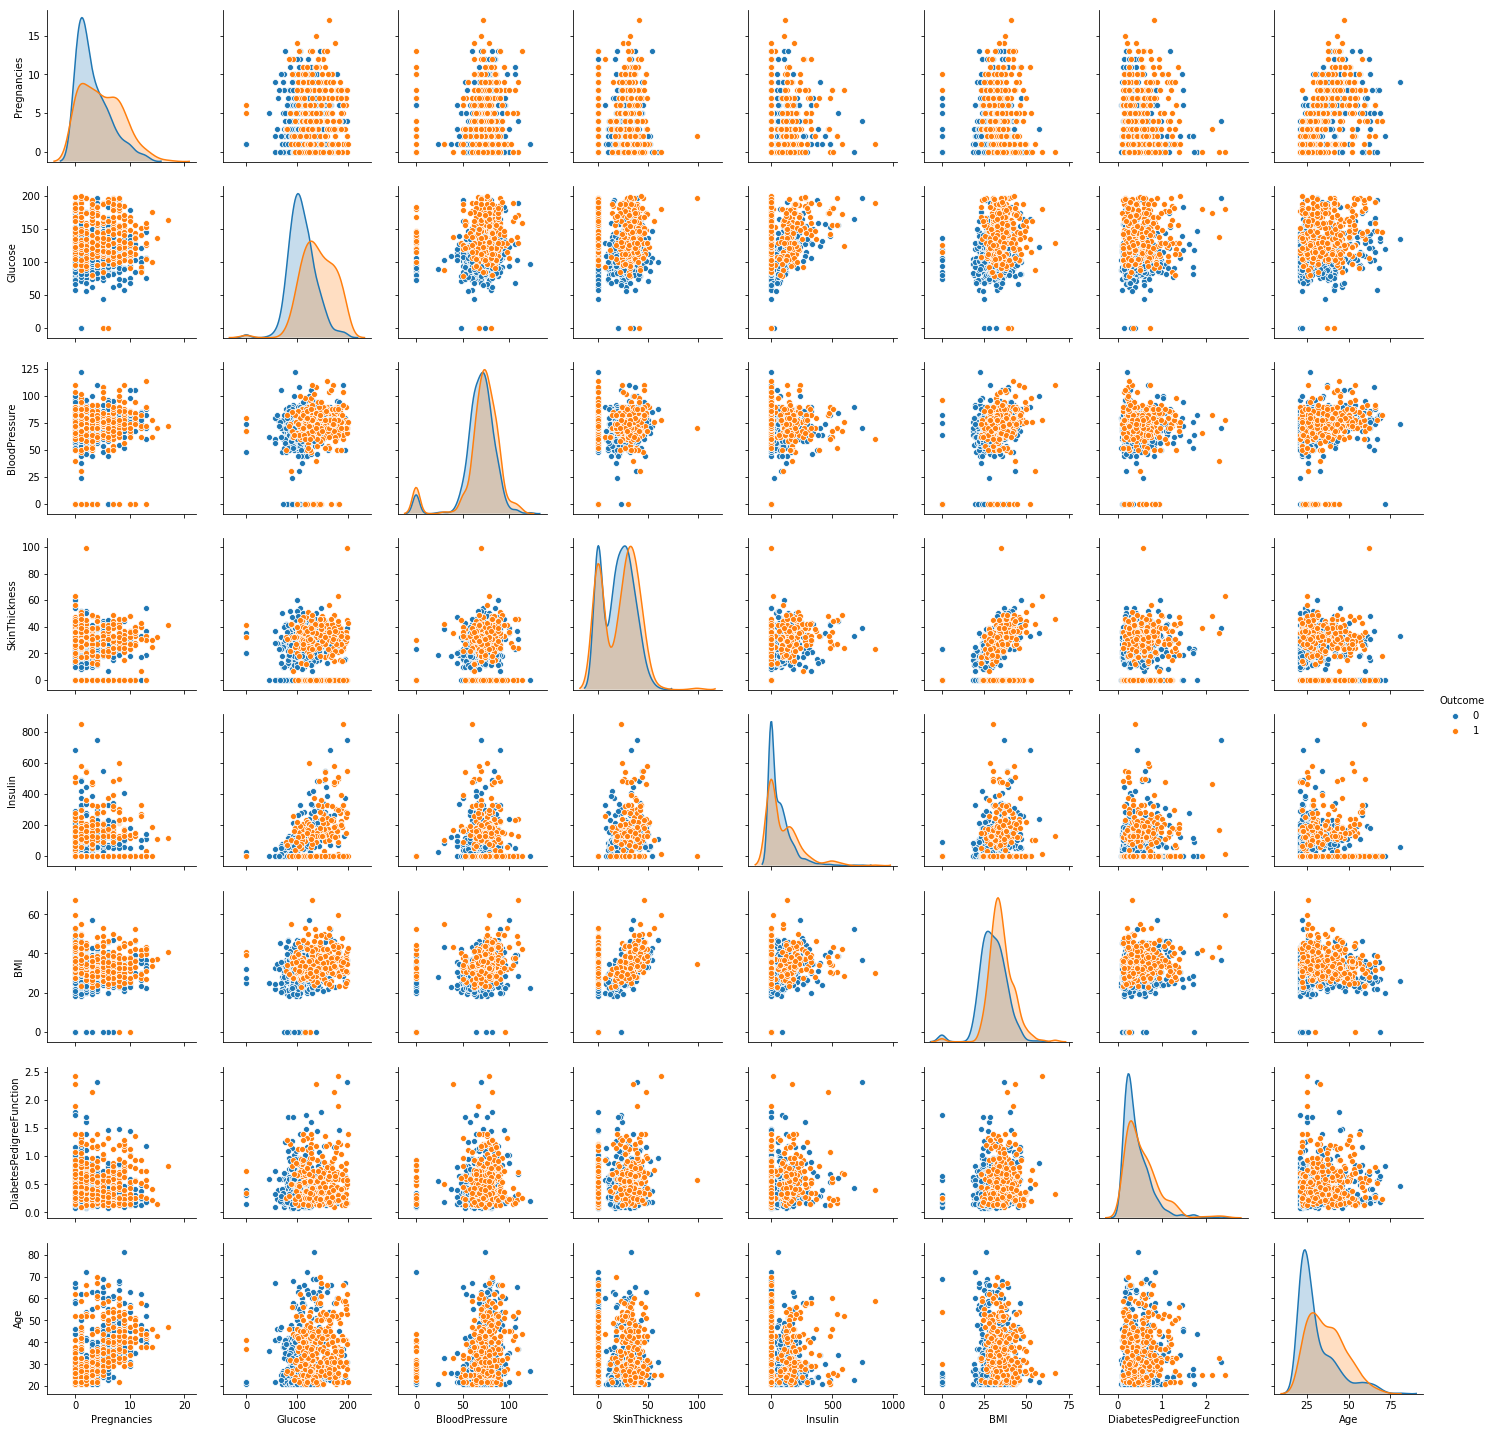

In [ ]:
sns.pairplot(diabetes, hue = 'Outcome', vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

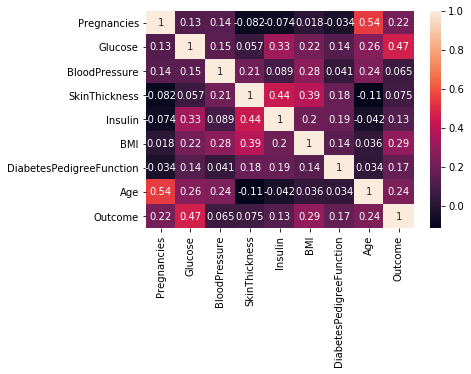

In [ ]:
sns.heatmap(diabetes.corr(), annot = True)


In [ ]:
X = diabetes.iloc[:, 0:8].values

In [ ]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
y = diabetes.iloc[:, 8].values

In [ ]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [ ]:
# Feature Scaling is a must in ANN
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


# STEP #3: TRAIN THE MODEL

In [ ]:
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Dense(units=400, activation='relu', input_shape=(8, )))
classifier.add(tf.keras.layers.Dropout(0.2))

classifier.add(tf.keras.layers.Dense(units=400, activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.2))

classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               3600      
_________________________________________________________________
dropout (Dropout)            (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               160400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 401       
Total params: 164,401
Trainable params: 164,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
epochs_hist = classifier.fit(X_train, y_train, epochs = 200)

Epoch 1/200
614/614 [==============================] - 0s 646us/sample - loss: 0.5496 - accuracy: 0.7264
Epoch 2/200
614/614 [==============================] - 0s 223us/sample - loss: 0.4538 - accuracy: 0.7866
Epoch 3/200
614/614 [==============================] - 0s 226us/sample - loss: 0.4334 - accuracy: 0.7915
Epoch 4/200
614/614 [==============================] - 0s 250us/sample - loss: 0.4343 - accuracy: 0.7915
Epoch 5/200
614/614 [==============================] - 0s 247us/sample - loss: 0.4319 - accuracy: 0.7915
Epoch 6/200
614/614 [==============================] - 0s 217us/sample - loss: 0.4227 - accuracy: 0.8013
Epoch 7/200
614/614 [==============================] - 0s 223us/sample - loss: 0.4064 - accuracy: 0.8143
Epoch 8/200
614/614 [==============================] - 0s 219us/sample - loss: 0.4007 - accuracy: 0.8094
Epoch 9/200
614/614 [==============================] - 0s 226us/sample - loss: 0.3988 - accuracy: 0.7980
Epoch 10/200
614/614 [==============================] -

In [ ]:
y_pred = classifier.predict(X_test)


In [ ]:
y_pred

array([[8.39620948e-01],
       [7.57718086e-01],
       [9.99986291e-01],
       [2.10421830e-01],
       [0.00000000e+00],
       [8.21303844e-01],
       [2.39431858e-04],
       [9.99930739e-01],
       [9.30993915e-01],
       [9.99551654e-01],
       [9.99998629e-01],
       [8.02756071e-01],
       [8.34465027e-07],
       [2.03350067e-01],
       [0.00000000e+00],
       [1.26845092e-01],
       [0.00000000e+00],
       [2.91973352e-04],
       [9.74080324e-01],
       [1.78813934e-07],
       [3.43646437e-01],
       [9.99962926e-01],
       [5.20050526e-04],
       [1.01625919e-05],
       [4.18782234e-04],
       [3.54953408e-02],
       [0.00000000e+00],
       [1.41829252e-04],
       [5.35310507e-02],
       [9.52552736e-01],
       [1.13469362e-03],
       [1.36196613e-05],
       [9.82618213e-01],
       [8.81377995e-01],
       [4.88591194e-03],
       [0.00000000e+00],
       [7.19559193e-03],
       [4.06029522e-02],
       [9.99830484e-01],
       [0.00000000e+00],


In [ ]:
y_pred = (y_pred > 0.5)

In [ ]:
y_pred

array([[ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [

# STEP#5: EVALUATING THE MODEL 

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

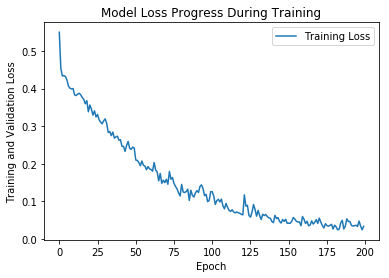

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss'])

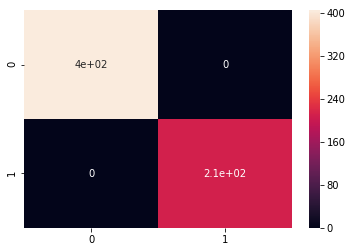

In [ ]:
# Training set Performance
from sklearn.metrics import confusion_matrix

y_train_pred = classifier.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_train_pred, y_train))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       404
        True       1.00      1.00      1.00       210

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



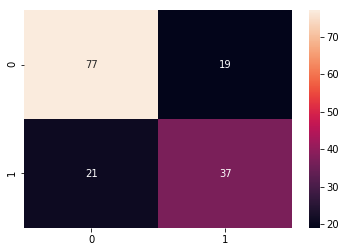

In [ ]:
# Testing Set Performance
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79        96
           1       0.66      0.64      0.65        58

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154

